In [ ]:
# 구글 드라이브에 있는 데이터 가져오기
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 불러오기
import imageio
import random, shutil
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import librosa
import librosa.display

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Inspect an audio file from the dataset.

sample_path = '/content/drive/MyDrive/jazz.00054.wav'

# if you want to listen to the audio, uncomment below.
display.Audio(filename=sample_path)

y: [ 0.2270813   0.20773315  0.19116211 ... -0.07705688 -0.06759644
 -0.07684326] 

y shape: (662112,) 

Sample rate (KHz): 22050 

Length of audio: 30.027755102040818


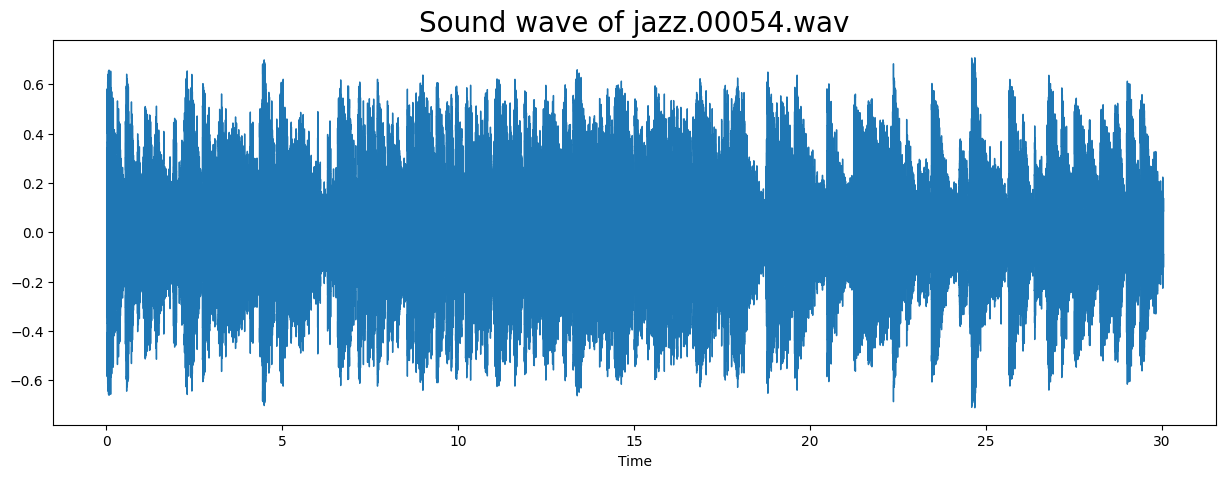

In [ ]:
y, sample_rate = librosa.load(sample_path)

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample rate (KHz):', sample_rate, '\n')
print(f'Length of audio: {np.shape(y)[0]/sample_rate}')

# Plot th sound wave.

plt.figure(figsize=(15, 5))
librosa.display.waveshow(y=y, sr=sample_rate);
plt.title("Sound wave of jazz.00054.wav", fontsize=20)
plt.show()

Shape of D object: (1025, 1294)


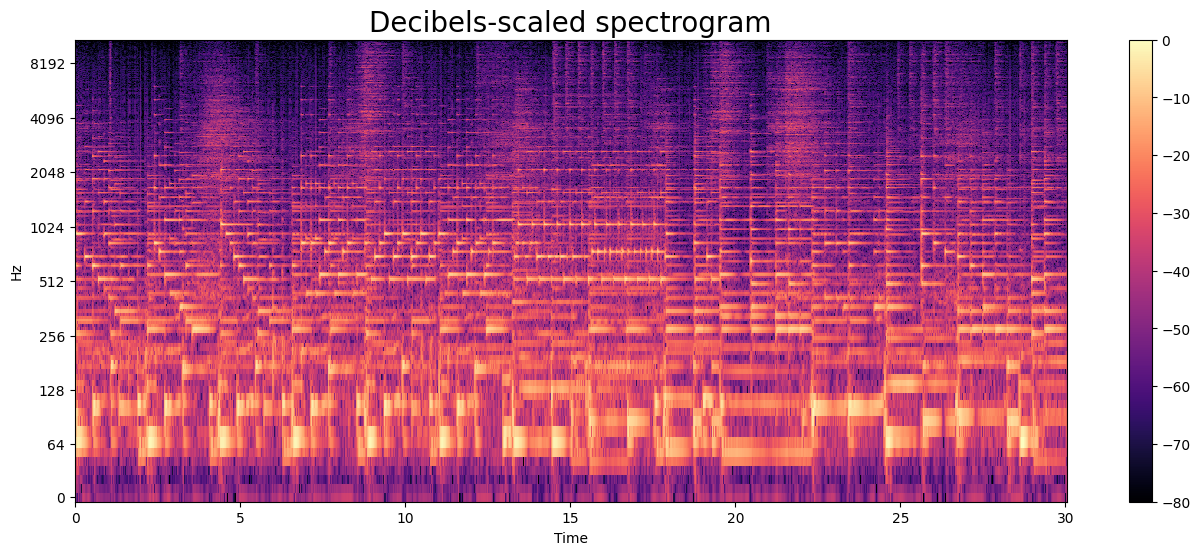

In [ ]:
# Convert sound wave to spectrogram.

# Short-time Fourier transform (STFT).

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
print('Shape of D object:', np.shape(D))

# Convert amplitude spectrogram to Decibels-scaled spectrogram.

DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the spectogram.

plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr=sample_rate, hop_length=512,
                         x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Decibels-scaled spectrogram', fontsize=20)
plt.show()

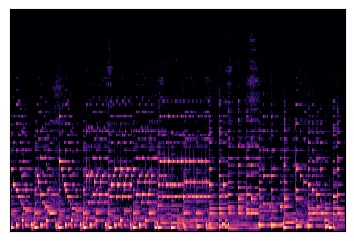

In [ ]:
# Convert sound wave to mel spectrogram.

y, sr = librosa.load(sample_path)

S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(4.32, 2.88))
librosa.display.specshow(S_DB, sr=sr, hop_length=512)
plt.savefig('/content/jazz00054.png')

plt.show()

<ipython-input-27-fa4a6687257d>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


(288, 432, 4)


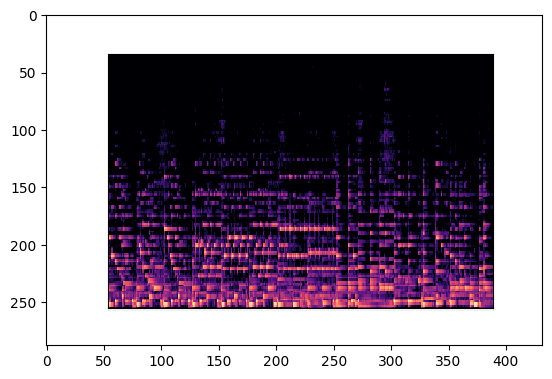

In [ ]:
# Visualize the mel spectrogram of the same sample from the dataset.

img_path = '/content/jazz00054.png'
img = imageio.imread(img_path)
print(img.shape)

plt.imshow(img, interpolation='nearest')
plt.show()